# Overview 

I’ve started a data science project to understand the connection between natural disasters and popular opinion, especially towards the government and other aid providers. I plan on applying sentiment analysis tools to Twitter data after natural disasters, beginning with the 2018 Anchorage Earthquake because the tweets will be in English and reference organizations with which I should be nominally familiar. While I have practically zero experience in these types projects, I do have… ummm... grit?

... more importantly, I have the Internet and it's vast quantities of information, some of which are in the form of MOOCs

My knowledge of programming is entirely derived from:  
  
    -CodeAcademy [Python, Git]  
    -"Natural Language Processing with Python"  
    -Coursera's Machine Learning course with Andrew Ng  
    -"Python for Data Analysis"  
    -Fastai's Machine Learning for Coders  
    -UTAustin's MOOC: Foundations of Data Analysis pt. I  
    -Stanford's CS224n  
    -Random articles about Sentiment Analysis courtesy of Google  

My method for studying natural disasters and popular opinion was sentiment analysis of publically available responses in the wake of natural disasters. Specifically, I focused on Tweet data because guides for scraping the information were plentiful and I believed the volume would lend itself to consistent results.

I trained a variety of models, some shallow, some deeper. I used TF-IDF and CountVectorizer, although by the time I finish writing I hope to have implemented word2vec as well. To be honest, I did not completely grasp what I was doing as I used them, but my understand has been deepend by the process of writing down my thoughts and evaluating them after some time away. 

Common actors mentioned

In [197]:
Act_Cat = ['Government', 'Business', 'Philanthropic']
Actors = pd.DataFrame(index=Act_Cat, columns = ['Members'])
Actors.iloc[0][0] = 'USGS, Trump, Alaska Earthquake Center, Palin, Murkowski, Walker, DOT'
Actors.iloc[1][0] = 'BP, ExxonMobil, Alyeska Pipeline, Jeep'
Actors.iloc[2][0] = 'Red Cross (Alaska), Salvation Army, United Way of Anchorage, The Foraker Group'
pd.set_option('display.max_colwidth', -1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Actors)

,Members
Government,"USGS, Trump, Alaska Earthquake Center, Palin, Murkowski, Walker, DOT"
Business,"BP, ExxonMobil, Alyeska Pipeline, Jeep"
Philanthropic,"Red Cross (Alaska), Salvation Army, United Way of Anchorage, The Foraker Group"


## Technical Overview

### Search Terms

To identify key search terms, I essentially googled 'Alaska Earthquake' (sans quotation marks) and looked at the first couple pages of results. I wrote down repeated words and phrases, hashtags, organizations. I eventually settled on: "Alaska Earthquake", "AKQuake", and "AlaskaEarthquake". More detailed findings are here: https://medium.com/@chylirk/disaster-project-report-1-1708b838bbf1

### Scraping

To scrape the tweets, I initially used Tweepy (the native Twitter API) and Selenium. I settled on the latter because it provided an order of magnitude more tweets than Tweepy, even using the same search terms. The Alaska Earthquake has largely disappeared from public discourse which could account for the paucity of Tweepy results. From the little I've read, Tweepy's better suited for streaming data.

(I'd like to give a big shout out to Amardeep Chauhan and this exquisitely clear guide to using Selenium - https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac)

(And another nod of gratitude to Marco Bonzanini for their posts about Tweepy - The book on Social Media and Python is on the 'To Read' list - https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/ )

### Exploratory Data Analysis

I wish I had taken UTAustin's Fundamentals of Data Analysis course prior to exploration. I needed the reps in basic visualization and regression with R more than I needed half-remembered sections of 'Python for Data Analysis

I made wordclouds from the various tweet results, split them into earlier and later. I created scatterplots of likes and retweets over time. They suggested avenues for inquiry. I wrote more about them here - https://medium.com/@chylirk/disaster-project-report-2-9adf2691be91  

### Labeling

Labeling was entirely by hand with sentiment values of (-1, 0, 1). I didn't finish in one shot, nor did I keep track closely. Assuming each label took approxamitely 2 seconds, I estimate labelling took an hour all told.

#### Digression

This entire coding experience has opened my eyes to possibilities of generosity. I realize now that my outlook on careers and academic advancement was extremely corporate, largely about identifying scarcities, securing competitive advantages, and rendering them defensible. My experiences with MOOCs, online guides, and especially fastai have really denaturalized that perspective.

### Models

My benchmark was Textblob which returned an accuracy score of 50%  
    
Next I used a Logistic Regression with CountVectorizer - I learned about this through fast.ai's Machine learning for Coders course in addition to this wonderfully detailed Kaggle kernel - https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle

Logistic Regression's peak accuracy was ~80%, a substantial improvement over textblob, although I was surprised to see that unigram features alone consistently outperformed models that included bigrams and trigrams - For this part of the project, I'm indebted to Ricky Kim's series of blogposts at TowardsDataScience [https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd]

After this, I compared CountVectorizer with TF-IDF, only to find that CountVectorizer-based models consistently outperformed TF-IDF ones

Following these experiments solely with Logistic Regression, I then compared Logistic Regression to other algorithms:  
* LinearSVC,  
* AdaBoostClassifier,  
* MultinomialNB,  
* BernoulliNB,  
* RidgeClassifier,  
* PassiveAggressiveClassifier,  
* Perceptron,  
* and NearestCentroid

# Imports

In [40]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
from textblob import TextBlob

In [41]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
 
from bs4 import BeautifulSoup as bs
import time

In [42]:
import re
from time import time
from pprint import pprint

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [326]:
from tqdm import tqdm
from sklearn.svm import SVC

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from fastai.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import xgboost as xgb

# Scraping Data

## Selenium

In [52]:
def init_driver():
 
     # initiate the driver:
     driver = webdriver.Firefox(executable_path=r'../Disaster_Project/geckodriver.exe')
 
     # set a default wait time for the browser [5 seconds here]:
     driver.wait = WebDriverWait(driver, 5)
 
     return driver

In [53]:
def close_driver(driver):
    driver.close()
    return

In [54]:
def login_twitter(driver, username, password):
 
    # open the web page in the browser:
    driver.get("https://twitter.com/login")
 
    # find the boxes for username and password
    username_field = driver.find_element_by_class_name("js-username-field")
    password_field = driver.find_element_by_class_name("js-password-field")
 
    # enter your username:
    username_field.send_keys(username)
    driver.implicitly_wait(1)
 
    # enter your password:
    password_field.send_keys(password)
    driver.implicitly_wait(1)
 
    # click the "Log In" button:
    driver.find_element_by_class_name("EdgeButtom--medium").click()
 
    return

In [48]:
class wait_for_more_than_n_elements_to_be_present(object):
    def __init__(self, locator, count):
        self.locator = locator
        self.count = count
 
    def __call__(self, driver):
        try:
            elements = EC._find_elements(driver, self.locator)
            return len(elements) > self.count
        except StaleElementReferenceException:
            return False

In [49]:
def search_twitter(driver, query):
     # initial wait for the search results to load
    wait = WebDriverWait(driver, 10)

    # wait until the search box has loaded:
    box = driver.wait.until(EC.presence_of_element_located((By.NAME, "q")))
 
    # find the search box in the html:
    driver.find_element_by_name("q").clear()
 
    # enter your search string in the search box:
    box.send_keys(query)
 
    # submit the query (like hitting return):
    box.submit()
 
 
    try:
        # wait until the first search result is found. Search results will be tweets, which are html list items and have the class='data-item-id':
        wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "li[data-item-id]")))
 
        # scroll down to the last tweet until there are no more tweets:
        while True:
 
            # extract all the tweets:
            tweets = driver.find_elements_by_css_selector("li[data-item-id]")
 
            # find number of visible tweets:
            number_of_tweets = len(tweets)
 
            # keep scrolling:
            driver.execute_script("arguments[0].scrollIntoView();", tweets[-1])
 
            try:
                # wait for more tweets to be visible:
                wait.until(wait_for_more_than_n_elements_to_be_present(
                    (By.CSS_SELECTOR, "li[data-item-id]"), number_of_tweets))
 
            except TimeoutException:
                # if no more are visible the "wait.until" call will timeout. Catch the exception and exit the while loop:
                break
 
        # extract the html for the whole lot:
        page_source = driver.page_source
 
    except TimeoutException:
 
        # if there are no search results then the "wait.until" call in the first "try" statement will never happen and it will time out. So we catch that exception and return no html.
        page_source=None
 
    return page_source

In [50]:
def extract_tweets(page_source):
 
    soup = bs(page_source,'lxml')
 
    tweets = []
    for li in soup.find_all("li", class_='js-stream-item'):
 
        # If our li doesn't have a tweet-id, we skip it as it's not going to be a tweet.
        if 'data-item-id' not in li.attrs:
            continue
 
        else:
            tweet = {
                'tweet_id': li['data-item-id'],
                'text': None,
                'user_id': None,
                'user_screen_name': None,
                'user_name': None,
                'created_at': None,
                'retweets': 0,
                'likes': 0,
                'replies': 0
            }
 
            # Tweet Text
            text_p = li.find("p", class_="tweet-text")
            if text_p is not None:
                tweet['text'] = text_p.get_text()
 
            # Tweet User ID, User Screen Name, User Name
            user_details_div = li.find("div", class_="tweet")
            if user_details_div is not None:
                tweet['user_id'] = user_details_div['data-user-id']
                tweet['user_screen_name'] = user_details_div['data-screen-name']
                tweet['user_name'] = user_details_div['data-name']
 
            # Tweet date
            date_span = li.find("span", class_="_timestamp")
            if date_span is not None:
                tweet['created_at'] = float(date_span['data-time-ms'])
 
            # Tweet Retweets
            retweet_span = li.select("span.ProfileTweet-action--retweet > span.ProfileTweet-actionCount")
            if retweet_span is not None and len(retweet_span) > 0:
                tweet['retweets'] = int(retweet_span[0]['data-tweet-stat-count'])
 
            # Tweet Likes
            like_span = li.select("span.ProfileTweet-action--favorite > span.ProfileTweet-actionCount")
            if like_span is not None and len(like_span) > 0:
                tweet['likes'] = int(like_span[0]['data-tweet-stat-count'])
 
            # Tweet Replies
            reply_span = li.select("span.ProfileTweet-action--reply > span.ProfileTweet-actionCount")
            if reply_span is not None and len(reply_span) > 0:
                tweet['replies'] = int(reply_span[0]['data-tweet-stat-count'])
 
            tweets.append(tweet)
 
    return tweets

In [56]:
if __name__ == "__main__":
 
    # start a driver for a web browser:
    driver = init_driver()
 
    # log in to twitter (replace username/password with your own):
    username = '_______'
    password = '_______'
    login_twitter(driver, username, password)
 
    # search twitter:
    query = "_______"
    page_source = search_twitter(driver, query)
 
    # extract info from the search results:
    Ktweets = extract_tweets(page_source)

    # close the driver:
    close_driver(driver)

## Tweepy

In [ ]:
consumer_key = '_______'
consumer_secret = '_______'
access_token =a '_______-_______'
access_secret = '_______'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

for friend in tweepy.Cursor(api.friends).items():
    print(friend._json['name'])

# Exploring Data

In [62]:
AKQuake = pd.read_csv(f'Data/AKQuake.csv', low_memory=False)

Alaska_Earthquake = pd.read_csv(f'Data/Alaska_Earthquake.csv', low_memory=False)

AKEarthquake = pd.read_csv(f'Data/AKEarthquake.csv', low_memory=False)

In [1]:
AKQuake.describe()

NameError: name 'AKQuake' is not defined

In [65]:
AKEarthquake.describe()

,Unnamed: 0,created_at,likes,replies,retweets,tweet_id,user_id
count,20.00000,2.000000e+01,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01
mean,9.50000,1.543885e+12,30.700000,2.750000,11.900000,1.069756e+18,1.703798e+09
std,5.91608,4.525154e+08,37.042081,4.598341,23.507893,1.897987e+15,1.332163e+09
min,0.00000,1.543623e+12,2.000000,0.000000,0.000000,1.068656e+18,6.747632e+06
25%,4.75000,1.543647e+12,10.000000,0.000000,0.750000,1.068760e+18,2.476421e+08
50%,9.50000,1.543670e+12,14.500000,1.000000,1.000000,1.068858e+18,2.245900e+09
75%,14.25000,1.543870e+12,27.750000,3.000000,7.500000,1.069693e+18,2.916896e+09
max,19.00000,1.545157e+12,130.000000,19.000000,95.000000,1.075091e+18,3.249496e+09


In [66]:
Alaska_Earthquake.describe()

,Unnamed: 0,created_at,likes,replies,retweets,tweet_id,user_id
count,1552.000000,1.552000e+03,1552.000000,1552.000000,1552.000000,1.552000e+03,1.552000e+03
mean,775.500000,1.514103e+12,242.469072,13.493557,138.994845,9.448406e+17,8.236757e+16
std,448.168123,3.368731e+10,2240.461312,104.141784,841.635350,1.412948e+17,2.545762e+17
min,0.000000,1.443189e+12,0.000000,0.000000,0.000000,6.474080e+17,4.283330e+05
25%,387.750000,1.494386e+12,8.000000,0.000000,6.750000,8.621426e+17,1.983154e+07
50%,775.500000,1.516765e+12,35.000000,1.000000,25.500000,9.560093e+17,9.411910e+07
75%,1163.250000,1.543619e+12,115.000000,7.000000,78.250000,1.068643e+18,8.017235e+08
max,1551.000000,1.545405e+12,72348.000000,2681.000000,27715.000000,1.076133e+18,1.075584e+18


In [76]:
frames = [AKQuake, AKEarthquake, Alaska_Earthquake]

In [153]:
total = pd.concat(frames)

(array([ 42., 319.,   8.,  46.,  45.,  52.,  62., 346.,  56., 696.]),
 array([1.443189e+12, 1.453411e+12, 1.463632e+12, 1.473854e+12, 1.484075e+12, 1.494297e+12, 1.504519e+12, 1.514740e+12,
        1.524962e+12, 1.535183e+12, 1.545405e+12]),
 <a list of 10 Patch objects>)

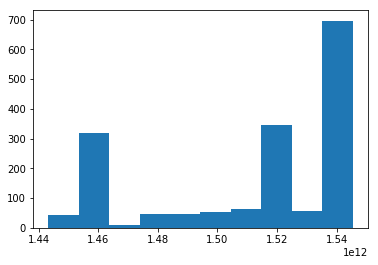

In [187]:
plt.hist(total.created_at)

## Likes

In [124]:
total.likes.describe()

count     1672.000000
mean       226.422249
std       2159.302497
min          0.000000
25%          7.000000
50%         30.500000
75%        103.000000
max      72348.000000
Name: likes, dtype: float64

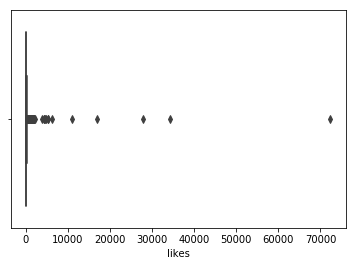

In [80]:
sns.boxplot(total.likes)

### Investigating Outliers

In [154]:
Like_outliers = total[total.likes > 247]

In [155]:
mod = total.drop(Like_outliers.index)

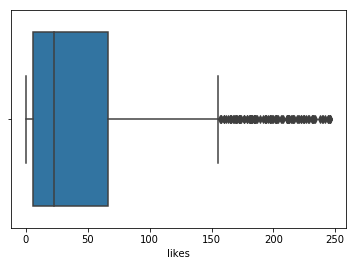

In [129]:
sns.boxplot(mod.likes)

### Time-Series

Added one to each entry's like count in order to take the log

In [145]:
total.likes = np.log(total.likes + 1)

Plot of all tweets' like counts against time

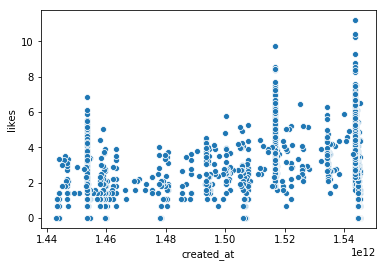

In [111]:
sns.scatterplot(data=total,x='created_at',y='likes')

/home/holden/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


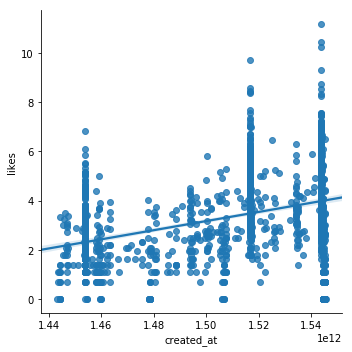

In [149]:
sns.lmplot(x="created_at", y="likes", data=total);

Plot of the outliers' like counts against time

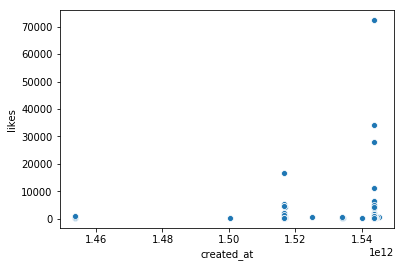

In [130]:
sns.scatterplot(data=Like_outliers,x='created_at',y='likes')

Plot of non-outlier like counts against time

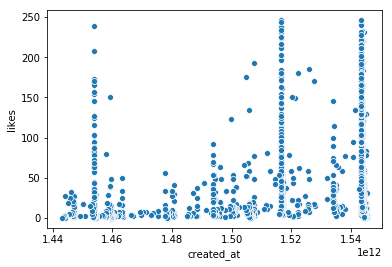

In [156]:
sns.scatterplot(data=mod, x='created_at',y='likes')

/home/holden/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


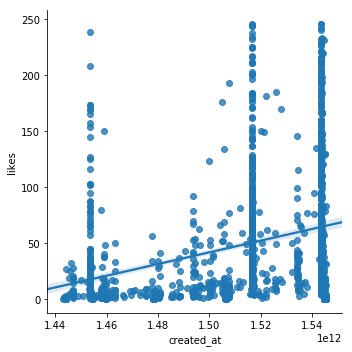

In [157]:
sns.lmplot(x="created_at", y="likes", data=mod);

## Retweets

In [131]:
total.retweets.describe()

count     1672.000000
mean       129.926435
std        811.537519
min          0.000000
25%          6.000000
50%         22.000000
75%         74.000000
max      27715.000000
Name: retweets, dtype: float64

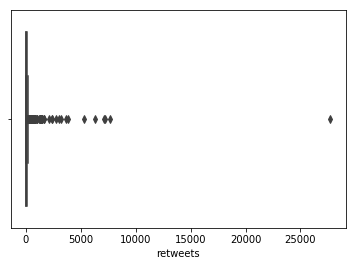

In [132]:
sns.boxplot(total.retweets)

### Investigating Outliers

In [120]:
RT_outliers = total[total.retweets > 74 + (68*1.5)]

In [133]:
RT_mod = total.drop(RT_outliers.index)

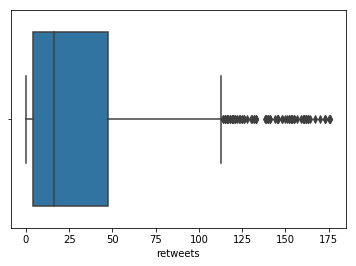

In [135]:
sns.boxplot(RT_mod.retweets)

### Time-Series

Added one to each entry's like count in order to take the log

In [136]:
total.retweets = np.log(total.retweets + 1)

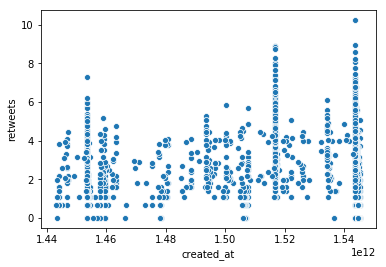

In [137]:
sns.scatterplot(data=total,x='created_at',y='retweets')

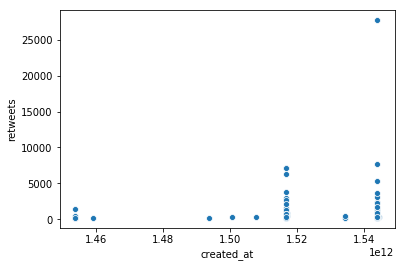

In [138]:
sns.scatterplot(data=RT_outliers,x='created_at',y='retweets')

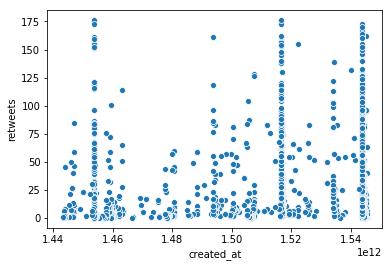

In [139]:
sns.scatterplot(data=RT_mod,x='created_at',y='retweets')

## Word Clouds

In [161]:
text = " ".join(text for text in total.text)

In [162]:
wordcloud = WordCloud().generate(text)

### General

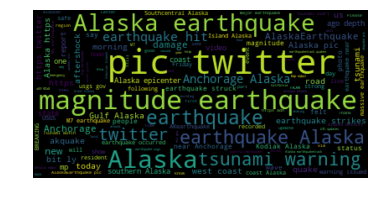

In [163]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [184]:
stopwords = set(STOPWORDS)
stopwords.update(["Alaska", "twitter", "pic", "earthquake", "Alaska", "Anchorage", "today", "ly", "coast" "west  coast", "now", "magnitude", "https", "tsunami", "akquake", "quake", "Gulf", "AlaskaEarthquake"])

In [185]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

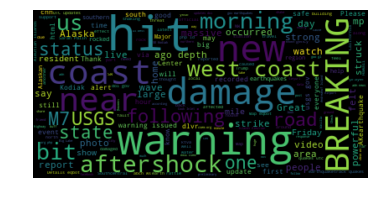

In [186]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Time-Series

Wordclouds based on the first and second half of tweets split based on the median tweet

In [188]:
total.created_at.describe()

count    1.672000e+03
mean     1.512193e+12
std      3.505615e+10
min      1.443189e+12
25%      1.485591e+12
50%      1.516743e+12
75%      1.543619e+12
max      1.545405e+12
Name: created_at, dtype: float64

In [189]:
total_1 = total[total.created_at > 1.516743e+12]

In [190]:
total_2 = total[total.created_at < 1.516743e+12]

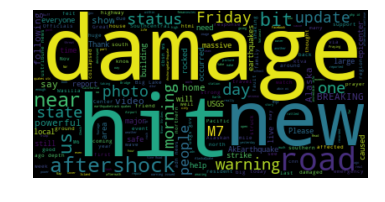

In [192]:
total_1_text = " ".join(tweet for tweet in total_1['text'])

stopwords = set(STOPWORDS)
stopwords.update(["Alaska", "twitter", "pic", "earthquake", "Alaska", "Anchorage", "today", "ly", "coast" "west  coast", "now", "magnitude", "https", "tsunami", "akquake", "quake", "Gulf", "AlaskaEarthquake"])

wordcloud = WordCloud(stopwords=stopwords).generate(total_1_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

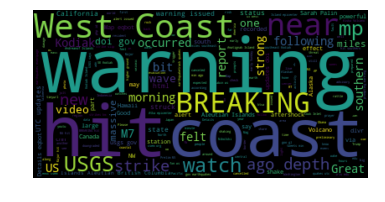

In [193]:
total_2_text = " ".join(tweet for tweet in total_2['text'])

stopwords = set(STOPWORDS)
stopwords.update(["Alaska", "twitter", "pic", "earthquake", "Alaska", "Anchorage", "today", "ly", "coast" "west  coast", "now", "magnitude", "https", "tsunami", "akquake", "quake", "Gulf", "AlaskaEarthquake"])

wordcloud = WordCloud(stopwords=stopwords).generate(total_2_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cleaning

Used regex to clean each tweet of special characters

In [194]:
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [220]:
total['text'] = [clean_tweet(tweet) for tweet in total['text']]

Not all vestiges of urls were removed, as evidenced by some tweets being longer than 280 characters

In [222]:
total['length'] = [len(t) for t in total.text]

<function matplotlib.pyplot.show(*args, **kw)>

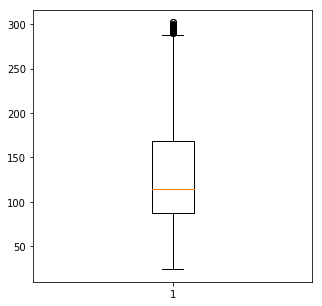

In [223]:
fig, ax = plt.subplots(figsize = (5,5))
plt.boxplot(total.length)
plt.show

In [224]:
long = [text for text in total[total.length > 280].text]

In [231]:
total.text = [re.sub(r'pic twitter com [A-Za-z0-9./]+','', t) for t in total.text]

In [232]:
total.length = [len(t) for t in total.text]

<function matplotlib.pyplot.show(*args, **kw)>

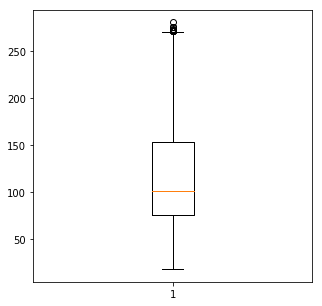

In [233]:
fig, ax = plt.subplots(figsize = (5,5))
plt.boxplot(total.length)
plt.show

In [234]:
total.to_csv('total.csv')

Exported as csv file in order to label by hand in a spreadsheet

## Creating Value/Label Split

In [241]:
total2 = pd.read_csv(f'total.csv', low_memory=False)

In [242]:
total2.head()

,Unnamed: 0,Unnamed: 0.1,created_at,likes,replies,retweets,text,tweet_id,user_id,user_name,user_screen_name,length
0,0,0,1.453632e+12,9,1,3,Holy Earthquake Batman That one was a big one AKquake hanginglightstillswinging,691209471821946880,1248151147,Kurt Seamans,AKsconsin,79
1,1,1,1.453635e+12,10,0,0,Thanks Obama AKearthquake AKquake,691222726942560256,153552969,🌎 bill bryan 🌎,wlbryan,33
2,2,2,1.453632e+12,8,1,2,Back to bed Tell me the magnitude in the morning akquake,691208612425781249,930565868,Sebastian G.S.,NewsGumshoe,56
3,3,3,1.453634e+12,11,1,4,I hear Idaho is a nice place to live AKQuake,691216904489271297,24409419,"Sarah Erkmann Ward, APR",serkmann,44
4,4,4,1.453633e+12,11,0,2,Are we just supposed to go back to sleep now AKquake iwassleepingsogood,691211215381467136,358487311,Brad Hillwig,BradHillwig,71


In [243]:
total2['sentiment'] = 0

In [249]:
df = total2[['text', 'sentiment']]

In [256]:
df.to_csv('df.csv')

In [252]:
train_value_tweets = df.iloc[:,:1]
train_label_tweets = df.iloc[:, 1:]

In [254]:
trn = train_value_tweets.iloc[:,0]
trn_y = train_label_tweets.iloc[:,0]

In [255]:
trn.to_csv('trn.csv')
trn_y.to_csv('trn_y.csv')

# Feature Engineering

## CountVectorizer

Long story short, I balanced the number of positive/neutral/negative tweets by copying the positive and negative tweets until they matched the number of neutral ones - this dataset was named 'Balanced_Data'

In [284]:
my_df = pd.read_csv('Data/Balanced_Data.csv')

In [285]:
cvec = CountVectorizer()

In [286]:
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [287]:
neg_doc_matrix = cvec.transform(my_df[my_df.sentiment == -1].text)
neu_doc_matrix = cvec.transform(my_df[my_df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.sentiment == 1].text)

In [288]:
neg_tf = np.sum(neg_doc_matrix, axis=0)
neu_tf = np.sum(neu_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)

In [289]:
neg = np.squeeze(np.asarray(neg_tf))
neu = np.squeeze(np.asarray(neu_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [290]:
term_freq_df = pd.DataFrame([neg, neu, pos], columns = cvec.get_feature_names()).transpose()

In [291]:
term_freq_df['total'] = term_freq_df[0] + term_freq_df[1] + term_freq_df[2]

# Models

## Train/Validation/Test Split

Create Training, Validation, and Test Sets

In [292]:
my_df = pd.read_csv('Data/Balanced_Data.csv')

In [293]:
x = my_df.text
y = my_df.sentiment

In [294]:
from sklearn.model_selection import train_test_split
SEED = 2000

In [295]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size = .2, random_state=SEED)

In [296]:
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [302]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(x_train), (len(x_train[y_train == -1]) / (len(x_train)*1.))*100, (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100) )

Train set has total 1763 entries with 32.79% negative, 33.64% neutral, 33.58% positive


In [301]:
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(x_validation), (len(x_validation[y_validation == -1]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))

Validation set has total 220 entries with 36.36% negative, 28.64% neutral, 35.00% positive


In [300]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(x_test), (len(x_test[y_test == -1]) / (len(x_test)*1.))*100, (len(x_test[y_test == 0]) / (len(x_test)*1.))*100, (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Test set has total 221 entries with 36.20% negative, 32.58% neutral, 31.22% positive


## TextBlob

In [303]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [304]:
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]

In [305]:
tbpred = [-1 if n < 0 else 0 if n == 0 else 1 for n in tbresult]

In [306]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[-1, 0, 1]))

In [307]:
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative', 'predicted_neutral', 'predicted_positive'])

In [308]:
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_validation, tbpred))

Accuracy Score: 49.55%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_neutral  predicted_positive
negative  26                  19                 35                
neutral   10                  28                 25                
positive  7                   15                 55                
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

         -1       0.60      0.33      0.42        80
          0       0.45      0.44      0.45        63
          1       0.48      0.71      0.57        77

avg / total       0.52      0.50      0.48       220



## Logistic Regression

In [318]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [328]:
cvec = CountVectorizer()
lr = LogisticRegression(multi_class = 'ovr')
n_features = np.arange(100,3000,100)

In [329]:
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [330]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [335]:
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 100 features
accuracy score: 66.82%
train and test time: 0.09s
--------------------------------------------------------------------------------
Validation result for 200 features
accuracy score: 74.09%
train and test time: 0.06s
--------------------------------------------------------------------------------
Validation result for 300 features
accuracy score: 80.45%
train and test time: 0.05s
--------------------------------------------------------------------------------
Validation result for 400 features
accuracy score: 84.55%
train and test time: 0.05s
--------------------------------------------------------------------------------
Validation result for 500 feat

accuracy score: 96.36%
train and test time: 0.09s
--------------------------------------------------------------------------------
Validation result for 1900 features
accuracy score: 96.36%
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for 2000 features
accuracy score: 95.91%
train and test time: 0.08s
--------------------------------------------------------------------------------
Validation result for 2100 features
accuracy score: 96.36%
train and test time: 0.08s
--------------------------------------------------------------------------------
Validation result for 2200 features
accuracy score: 95.91%
train and test time: 0.08s
--------------------------------------------------------------------------------
Validation result for 2300 features
accuracy score: 96.36%
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for 2400 feature

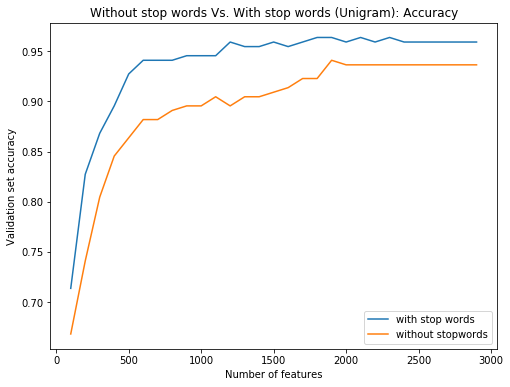

In [338]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy, label='without stopwords')
plt.title("Without stop words Vs. With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [339]:
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 100 features
accuracy score: 69.55%
train and test time: 0.13s
--------------------------------------------------------------------------------
Validation result for 200 features
accuracy score: 85.00%
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for 300 features
accuracy score: 86.36%
train and test time: 0.11s
--------------------------------------------------------------------------------
Validation result for 400 features
accuracy score: 90.91%
train and test time: 0.11s
--------------------------------------------------------------------------------
Validation result for 500 features

accuracy score: 94.55%
train and test time: 0.19s
--------------------------------------------------------------------------------
Validation result for 1900 features
accuracy score: 94.55%
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for 2000 features
accuracy score: 94.55%
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for 2100 features
accuracy score: 94.55%
train and test time: 0.22s
--------------------------------------------------------------------------------
Validation result for 2200 features
accuracy score: 94.09%
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 2300 features
accuracy score: 94.09%
train and test time: 0.22s
--------------------------------------------------------------------------------
Validation result for 2400 feature

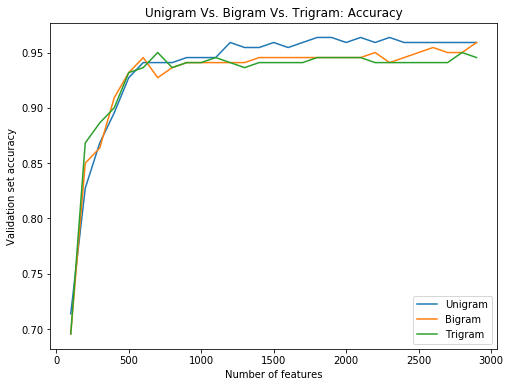

In [340]:
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='Unigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy, label='Bigram')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy, label='Trigram')
plt.title("Unigram Vs. Bigram Vs. Trigram: Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [333]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[-1,0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative', 'predicted_neutral', 'predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

In [334]:
%%time
tg_cvec = CountVectorizer(max_features=2500,ngram_range=(1, 1))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 71.36%
accuracy score: 95.91%
model is 24.55% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_neutral  predicted_positive
negative  80                  0                  0                 
neutral   4                   54                 5                 
positive  0                   0                  77                
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.95      1.00      0.98        80
    neutral       1.00      0.86      0.92        63
   positive       0.94      1.00      0.97        77

avg / total       0.96      0.96      0.96       220

CPU times: user 95.7 ms, sys: 64 µs, total: 95.8 ms
Wall time: 94 ms


# Predictions

In [347]:
prediction_data = pd.read_csv(f'Data/AE_test.csv', low_memory=False)

In [348]:
def predict(pipeline, x_train, y_train, x_predict, DataFrame):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_predict)
    DataFrame['pred'] = y_pred
    return DataFrame

In [349]:
ug_cvec = CountVectorizer(max_features=2500,ngram_range=(1, 1))
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])

In [350]:
predict(ug_pipeline, x_train, y_train, prediction_data['text'], prediction_data)

,text,sentiment,pred
0,OTD in 2002 M7 9 earthquake struck central Alaska The quake is the 9th largest to be recorded in the US pic twitter com md33Xb3Tag,NaN,0
1,1 6 magnitude earthquake 71km W of Cantwell Alaska,NaN,0
2,1 7 magnitude earthquake 80km S of Tok Alaska,NaN,0
3,1 7 magnitude earthquake 62km SSW of Cantwell Alaska,NaN,0
4,When an earthquake strikes the locals must pick up the pieces The price of living off grid Could you do it Alaska The Last Frontier 9pm pic twitter com VEQET2rVtl,NaN,0
5,I m presently in SE Alaska the relatively liberal part and from here it feels possible Clinton could win This would be an earthquake,NaN,0
6,The earthquake capitals in the U S used to be in California and Alaska Today its Oklahoma due to the fracking process Wysession,NaN,0
7,5 0 earthquake 71km SE of Atka Alaska 2016 10 27 13 31 28 at epicenter 21m ago depth 33km,NaN,0
8,There was an earthquake in 150km S of False Pass Alaska of magnitude 5 8 on Today at 7 53 AM ET MalliardReportpic twitter com ROFKmGtQPA,NaN,0
9,Prelim M5 8 earthquake Unimak Island region Alaska Oct 27 11 53 UTC updates,NaN,0


In [352]:
prediction_data[prediction_data.pred == -1]

,text,sentiment,pred
15,Just got woken up by an earthquake In Oklahoma City,NaN,-1
21,Alaska girl forever moment the couch started shaking and first thought was EARTHQUAKE when it was actually the cat scratching expat,NaN,-1
111,An earthquake rattled S Alaska Sunday biggest one in the region in decades pic twitter com uKxnIfEWRA,NaN,-1
120,WE are SAFE 250 miles from the epicenter but So AK gotRocked Earthquake Alaska pic twitter com CPSV141slS,NaN,-1
123,sarah palin endorses trump and then a 7 1 earthquake hits alaska,NaN,-1
194,Major 7 1 Earthquake hits Alaska just now stay safe Predictions 2016 Anchorage Quake,NaN,-1
204,PHOTO Cereal boxes and juice bottles are on the floor of a grocery store following an earthquake in Alaska,NaN,-1
211,It s not an earthquake It s just Alaska facepalming over Sarah Palin akquake,NaN,-1
223,The earthquake caused the road in Kasilof Alaska to SPLIT Here s a video of the damage,NaN,-1
229,At some point do I try and go back to sleep or do I just stay up What are the rest of you doing Alaska Earthquake,NaN,-1
